In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# 개별 파일 불러오기
# import pandas as pd
# save_path = '/content/drive/My Drive/data_journalism/Team_project/'
# filename = 'queendom_twitter_data_2019-08-29_to_2019-08-29.csv'
# csv_test = pd.read_csv(save_path + filename)

In [0]:
import pandas as pd
location = '/content/drive/My Drive/data_journalism/Team_project/'

keyword = ['마마무', 'AOA', '러블리즈', '오마이걸', '박봄', '아이들']
keyword_eng = ['mamamoo', 'AOA', 'lovelyz', 'omygirl', 'bom', 'idle']
total_tweet = []
tweet_num = []
retweet_sum = []
favorite_sum = []

for j in range(1, 11):
  filename = 'queendom_twitter_data_' + str(j) + '.csv'
  queendom_csv = pd.read_csv(location + filename)
  #print("======" + str(j) + '회======')
  #print("total tweet : " + str(len(queendom_csv)))
  tweet_num_temp = []
  retweet_sum_temp = []
  favorite_sum_temp = []
  
  for i in range(0,len(keyword)):
    temp_tw = queendom_csv[queendom_csv.text.apply(lambda e: keyword[i] in e)]
    tweet_num_temp.append(len(temp_tw))
    retweet_sum_temp.append(temp_tw.retweet_counts.sum())
    favorite_sum_temp.append(temp_tw.favorite_counts.sum())
    #print(keyword[i])
    #print("tweet number : " + str(len(temp_tw)))
    # print("retweet sum : " + str(temp_tw.retweet_counts.sum()))
    # print("favorite sum : " + str(temp_tw.favorite_counts.sum()))
  
  total_tweet.append(len(queendom_csv))
  tweet_num.append(tweet_num_temp)
  retweet_sum.append(retweet_sum_temp)
  favorite_sum.append(favorite_sum_temp)


import matplotlib.font_manager as fm

# 데이터 경로
location = '/content/drive/My Drive/data_journalism/Team_project/'

# 폰트 경로
font_location = location + 'kor.ttf'
fontprop = fm.FontProperties(fname=font_location, size=18) 
font = fm.FontProperties(fname=font_location, size=18)


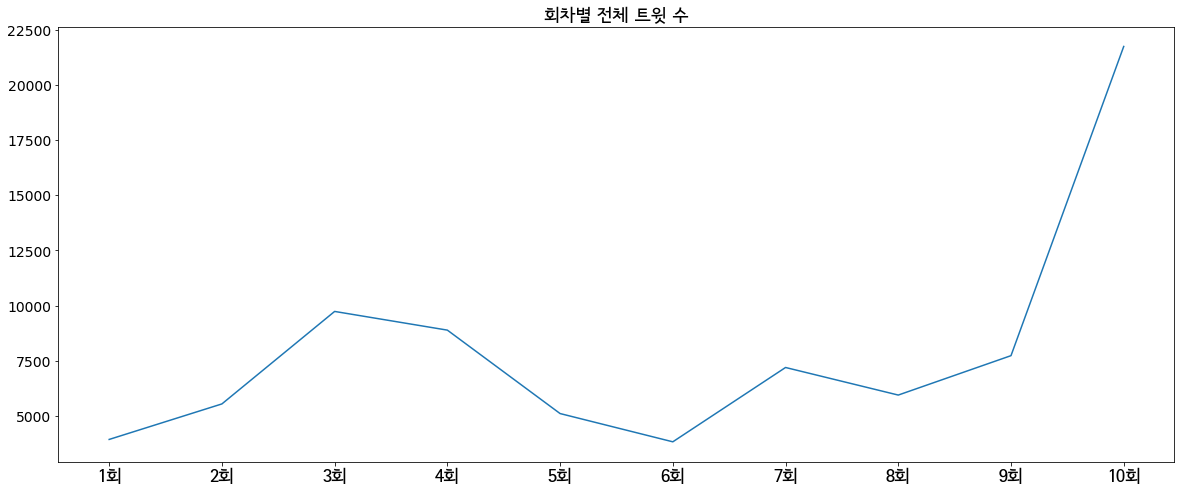

In [0]:
# 회차별 전체 트윗 수

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 8))
plt.plot(total_tweet)
plt.title('회차별 전체 트윗 수',fontproperties=fontprop)
plt.yticks(fontsize=14)
plt.xticks(np.arange(10),('1회','2회','3회','4회','5회','6회','7회','8회','9회','10회'),fontproperties=fontprop)
plt.show()

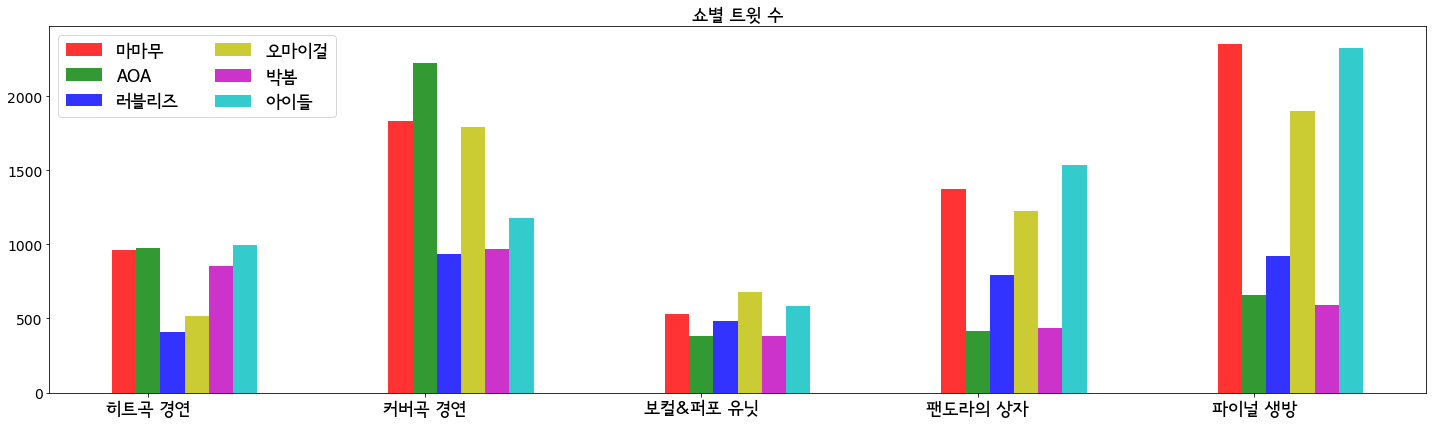

In [0]:
import matplotlib.font_manager as fm
from operator import add

# 데이터 경로
location = '/content/drive/My Drive/data_journalism/Team_project/'

# 폰트 경로
font_location = location + 'kor.ttf'
fontprop = fm.FontProperties(fname=font_location, size=18) 
font = fm.FontProperties(fname=font_location, size=18)

show_tweet_num = []

show_tweet_num.append(list(map(add, tweet_num[0], tweet_num[1])))
show_tweet_num.append(list(map(add, tweet_num[2], tweet_num[3])))
show_tweet_num.append(list(map(add, list(map(add, tweet_num[4], tweet_num[5])), tweet_num[6])))
show_tweet_num.append(list(map(add, tweet_num[7], tweet_num[8])))
show_tweet_num.append(tweet_num[9])


# data to plot
show_tweet_num_tr = np.array(show_tweet_num)
show_tweet_num_tr = show_tweet_num_tr.transpose()

n_groups = 3

# create plot
plt.figure(figsize=(20, 6))

index = np.arange(n_groups)
index = np.array([1,5,9,13,17])
bar_width = 0.35
opacity = 0.8


rects1 = plt.bar(index, show_tweet_num_tr[0], bar_width,
alpha=opacity,
color='r',
label=keyword[0])

rects2 = plt.bar(index + bar_width, show_tweet_num_tr[1], bar_width,
alpha=opacity,
color='g',
label=keyword[1])

rects3 = plt.bar(index + bar_width*2, show_tweet_num_tr[2], bar_width,
alpha=opacity,
color='b',
label=keyword[2])

rects4 = plt.bar(index + bar_width*3, show_tweet_num_tr[3], bar_width,
alpha=opacity,
color='y',
label=keyword[3])

rects5 = plt.bar(index + bar_width*4, show_tweet_num_tr[4], bar_width,
alpha=opacity,
color='m',
label=keyword[4])

rects6 = plt.bar(index + bar_width*5, show_tweet_num_tr[5], bar_width,
alpha=opacity,
color='c',
label=keyword[5])


plt.title('쇼별 트윗 수',fontproperties=fontprop)
plt.xticks(index + bar_width, ('히트곡 경연', '커버곡 경연', '보컬&퍼포 유닛', '팬도라의 상자', '파이널 생방'),fontproperties=fontprop)
plt.yticks(fontsize=14)
plt.legend(prop=font,loc=2,ncol=2)

plt.tight_layout()
plt.show()

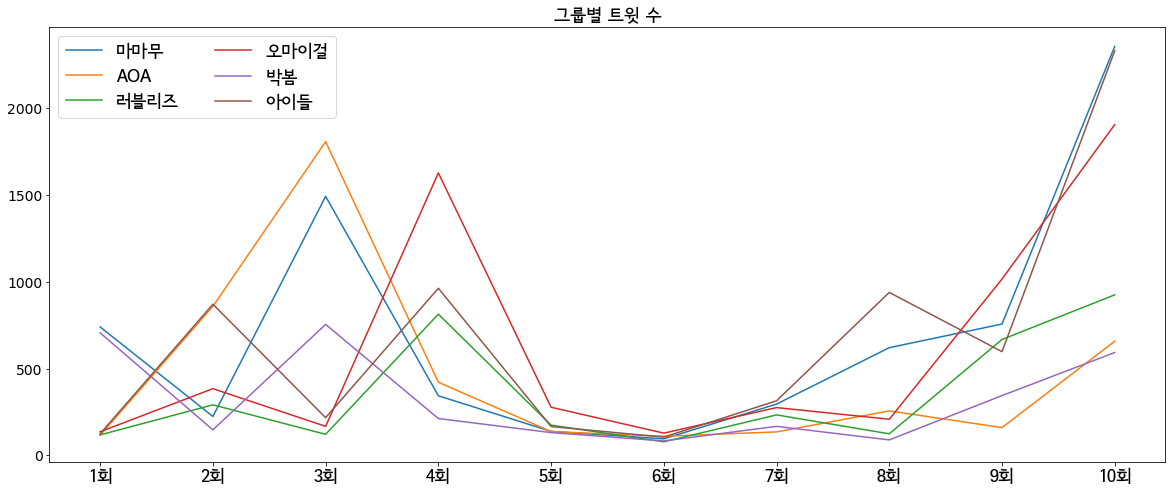

In [0]:
# 그룹별 트윗 수

plt.figure(figsize=(20, 8))
plt.plot(tweet_num)
plt.title('그룹별 트윗 수',fontproperties=fontprop)
plt.legend(keyword, prop=font,loc=2,ncol=2)
plt.yticks(fontsize=14)
plt.xticks(np.arange(10),('1회','2회','3회','4회','5회','6회','7회','8회','9회','10회'),fontproperties=fontprop)
plt.show()


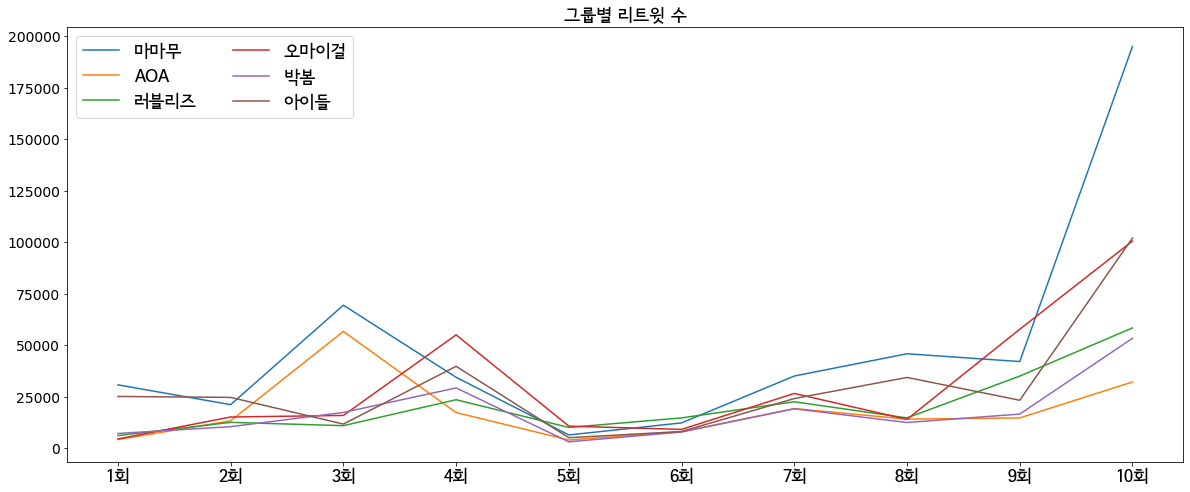

In [0]:
#그룹별 리트윗 수

plt.figure(figsize=(20, 8))
plt.plot(retweet_sum)
plt.title('그룹별 리트윗 수',fontproperties=fontprop)
plt.legend(keyword, prop=font,loc=2,ncol=2)
plt.yticks(fontsize=14)
plt.xticks(np.arange(10),('1회','2회','3회','4회','5회','6회','7회','8회','9회','10회'),fontproperties=fontprop)
plt.show()

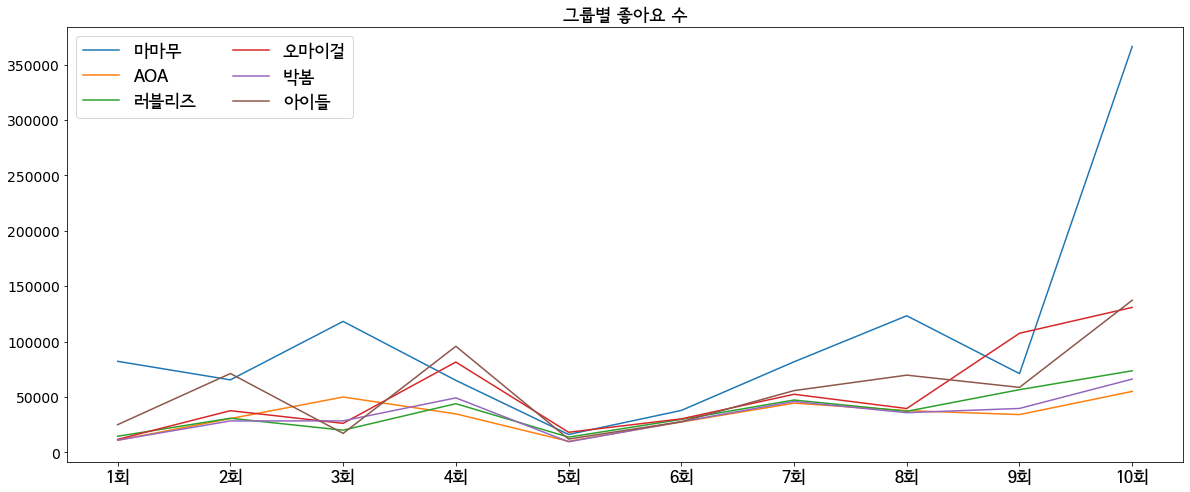

In [0]:
#그룹별 좋아요 수

plt.figure(figsize=(20, 8))
plt.plot(favorite_sum)
plt.title('그룹별 좋아요 수',fontproperties=fontprop)
plt.legend(keyword, prop=font,loc=2,ncol=2)
plt.yticks(fontsize=14)
plt.xticks(np.arange(10),('1회','2회','3회','4회','5회','6회','7회','8회','9회','10회'),fontproperties=fontprop)
plt.show()

In [0]:
#히트곡 경연(1+2), 커버곡 경연(3+4), 보컬&퍼포 유닛(5+6+7), 팬도라의 상자(8,9), 파이널생방(10) ==> 총 5번의 경연 / 28개의 무대영상

#유닛 라운드 : 5회(워크샵), 6회(중간점검), 7회(경연) ==> 5,6,7회차만 불러와서 아래 기준에 따라 트윗 수 필터링

#메인보컬 유닛 팀명으로 검색 : '봄&쩡', '아아', '구오' ==> 6회에 정해짐

#메인보컬 유닛 개인명으로 검색 : (여자)아이들 민니, 오마이걸 효정, 러블리즈 케이, 마마무 화사, AOA 혜정, 박봄

#메인댄서 유닛 팀명으로 검색 : '식스 퍼즐' ==> 5회에 정해짐

#메인댄서 유닛 개인명으로 검색 : (여자)아이들 수진, 오마이걸 유아, 러블리즈 예인, 마마무 문별, AOA 찬미 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
location = '/content/drive/My Drive/data_journalism/Team_project/'

unit_tname = ['봄&쩡', '아아', '구오','식스퍼즐']
unit_vname = ['민니', '효정', '케이','화사','혜정','박봄']
unit_dname = ['수진', '유아','예인','문별','찬미']
tweet_num_t = []
tweet_num_v = []
tweet_num_d = []


for j in range(5, 8):
  filename = 'queendom_twitter_data_' + str(j) + '.csv'
  queendom_csv = pd.read_csv(location + filename)
  #print("======" + str(j) + '회======')
  #print("total tweet : " + str(len(queendom_csv)))
  tweet_num_t_temp = []
  tweet_num_v_temp = []
  tweet_num_d_temp = []

  
  for i in range(0,len(unit_tname)):
    temp_tw = queendom_csv[queendom_csv.text.apply(lambda e: unit_tname[i] in e)]
    tweet_num_t_temp.append(len(temp_tw))
    #print(unit_tname[i])
    #print("tweet number : " + str(len(temp_tw)))

  for i in range(0,len(unti_vname)):
    temp_tw = queendom_csv[queendom_csv.text.apply(lambda e: unti_vname[i] in e)]
    tweet_num_v_temp.append(len(temp_tw))
    #print(">>>보컬 : " + unti_vname[i])
    #print("tweet number : " + str(len(temp_tw)))


  for i in range(0,len(unit_dname)):
    temp_tw = queendom_csv[queendom_csv.text.apply(lambda e: unit_dname[i] in e)]
    tweet_num_d_temp.append(len(temp_tw))
    #print(">>>댄서 : " + unit_dname[i])
    #print("tweet number : " + str(len(temp_tw)))

  tweet_num_t.append(tweet_num_t_temp)
  tweet_num_v.append(tweet_num_v_temp)
  tweet_num_d.append(tweet_num_d_temp)
   


In [0]:
# 그래프로 그리기

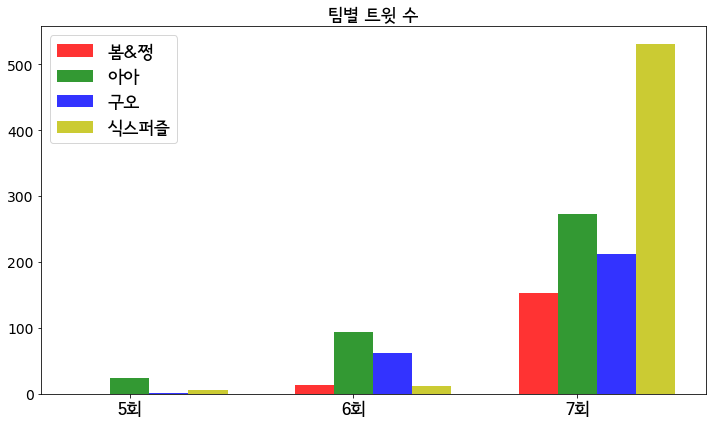

In [0]:
import matplotlib.font_manager as fm

# 데이터 경로
location = '/content/drive/My Drive/data_journalism/Team_project/'

# 폰트 경로
font_location = location + 'kor.ttf'
fontprop = fm.FontProperties(fname=font_location, size=18) 
font = fm.FontProperties(fname=font_location, size=18)

# data to plot
tweet_num_t_tr = np.array(tweet_num_t)
tweet_num_t_tr = tweet_num_t_tr.transpose()

n_groups = 3

# create plot
plt.figure(figsize=(10, 6))

index = np.arange(n_groups)
index = np.array([1,3,5])
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, tweet_num_t_tr[0], bar_width,
alpha=opacity,
color='r',
label=unit_tname[0])

rects2 = plt.bar(index + bar_width, tweet_num_t_tr[1], bar_width,
alpha=opacity,
color='g',
label=unit_tname[1])

rects3 = plt.bar(index + bar_width*2, tweet_num_t_tr[2], bar_width,
alpha=opacity,
color='b',
label=unit_tname[2])

rects4 = plt.bar(index + bar_width*3, tweet_num_t_tr[3], bar_width,
alpha=opacity,
color='y',
label=unit_tname[3])


plt.title('팀별 트윗 수',fontproperties=fontprop)
plt.xticks(index + bar_width, ('5회', '6회', '7회'),fontproperties=fontprop)
plt.yticks(fontsize=14)
plt.legend(prop=font)

plt.tight_layout()
plt.show()

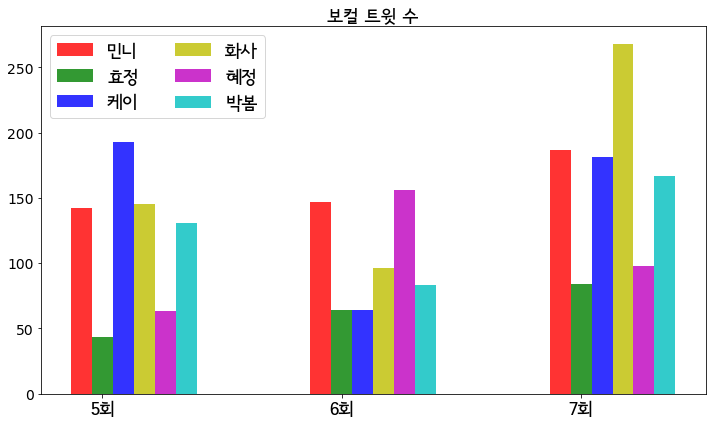

In [0]:
import matplotlib.font_manager as fm

# 데이터 경로
location = '/content/drive/My Drive/data_journalism/Team_project/'

# 폰트 경로
font_location = location + 'kor.ttf'
fontprop = fm.FontProperties(fname=font_location, size=18) 
font = fm.FontProperties(fname=font_location, size=18)

# data to plot
tweet_num_v_tr = np.array(tweet_num_v)
tweet_num_v_tr = tweet_num_v_tr.transpose()

n_groups = 3

# create plot
plt.figure(figsize=(10, 6))

index = np.arange(n_groups)
index = np.array([1,5,9])
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, tweet_num_v_tr[0], bar_width,
alpha=opacity,
color='r',
label=unit_vname[0])

rects2 = plt.bar(index + bar_width, tweet_num_v_tr[1], bar_width,
alpha=opacity,
color='g',
label=unit_vname[1])

rects3 = plt.bar(index + bar_width*2, tweet_num_v_tr[2], bar_width,
alpha=opacity,
color='b',
label=unit_vname[2])

rects4 = plt.bar(index + bar_width*3, tweet_num_v_tr[3], bar_width,
alpha=opacity,
color='y',
label=unit_vname[3])

rects5 = plt.bar(index + bar_width*4, tweet_num_v_tr[4], bar_width,
alpha=opacity,
color='m',
label=unit_vname[4])

rects6 = plt.bar(index + bar_width*5, tweet_num_v_tr[5], bar_width,
alpha=opacity,
color='c',
label=unit_vname[5])


plt.title('보컬 트윗 수',fontproperties=fontprop)
plt.xticks(index + bar_width, ('5회', '6회', '7회'),fontproperties=fontprop)
plt.yticks(fontsize=14)
plt.legend(prop=font,loc=2,ncol=2)

plt.tight_layout()
plt.show()

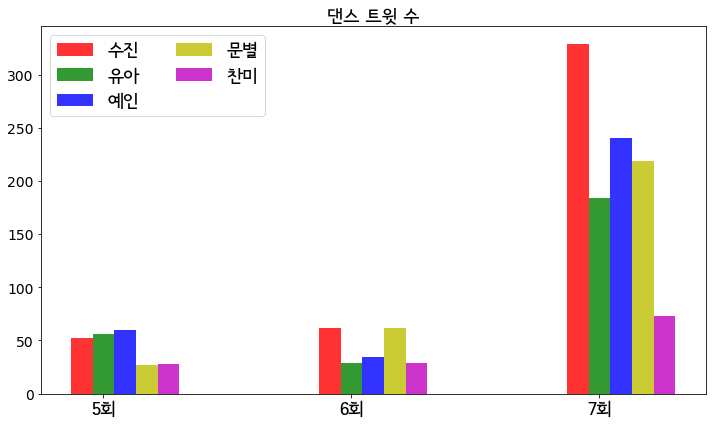

In [0]:
import matplotlib.font_manager as fm

# 데이터 경로
location = '/content/drive/My Drive/data_journalism/Team_project/'

# 폰트 경로
font_location = location + 'kor.ttf'
fontprop = fm.FontProperties(fname=font_location, size=18) 
font = fm.FontProperties(fname=font_location, size=18)

# data to plot
tweet_num_d_tr = np.array(tweet_num_d)
tweet_num_d_tr = tweet_num_d_tr.transpose()

n_groups = 3

# create plot
plt.figure(figsize=(10, 6))

index = np.arange(n_groups)
index = np.array([1,5,9])
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, tweet_num_d_tr[0], bar_width,
alpha=opacity,
color='r',
label=unit_dname[0])

rects2 = plt.bar(index + bar_width, tweet_num_d_tr[1], bar_width,
alpha=opacity,
color='g',
label=unit_dname[1])

rects3 = plt.bar(index + bar_width*2, tweet_num_d_tr[2], bar_width,
alpha=opacity,
color='b',
label=unit_dname[2])

rects4 = plt.bar(index + bar_width*3, tweet_num_d_tr[3], bar_width,
alpha=opacity,
color='y',
label=unit_dname[3])

rects5 = plt.bar(index + bar_width*4, tweet_num_d_tr[4], bar_width,
alpha=opacity,
color='m',
label=unit_dname[4])


plt.title('댄스 트윗 수',fontproperties=fontprop)
plt.xticks(index + bar_width, ('5회', '6회', '7회'),fontproperties=fontprop)
plt.yticks(fontsize=14)
plt.legend(prop=font,loc=2,ncol=2)

plt.tight_layout()
plt.show()